In [1]:
from src.scraping.get_data import *
from src.utils.checks import *
from src.portfolio.data_manipulation import *
from src.plots.basics import *
from src.computations.compute_returns import *
from src.computations.metrics import *
from src.utils.basics import *

get_data_info()
data = get_data_updated_2025()

download_data_updated()

In [2]:
get_list_of_portfolios()

['100_2factors',
 '80_20_ACWI',
 '80_20_World',
 '80_20_2factors',
 '80_20_1factor',
 '60_40_World']

In [15]:
import seaborn as sns

import plotly.express as px

def plot_annualized_returns(results, years=None, plot_figure=True):
    """
    Plots the annualized returns of indices over time interactively using Plotly and Seaborn style.
    """
    df = pd.DataFrame(results)
    df["Date"] = pd.to_datetime(df["Date"], format="%m/%Y")
    df.set_index("Date", inplace=True)

    # Seaborn style for consistency
    sns.set(style="whitegrid", context="talk")

    # Melt for Plotly
    df_reset = df.reset_index()
    df_melt = df_reset.melt(id_vars="Date", var_name="Portfolio", value_name="Annualized Return")

    fig = px.line(
        df_melt,
        x="Date",
        y="Annualized Return",
        color="Portfolio",
        title=f"Annualized Returns of {years} years rolling windows",
        labels={"Annualized Return": "Annualized Return (%)"},
        template="simple_white"
    )
    fig.update_traces(mode="lines", line=dict(width=2))
    fig.update_layout(
        yaxis_tickformat=".2%",
        xaxis_title="Date",
        yaxis_title="Annualized Return (%)",
        legend_title="Portfolio",
        title_font_size=18,
        title_font_family="Arial",
        legend=dict(font=dict(size=14)),
        xaxis=dict(tickformat="%Y")
    )
    return fig

In [16]:
fig = plot_annualized_returns(final_results, years=years)
fig.show()

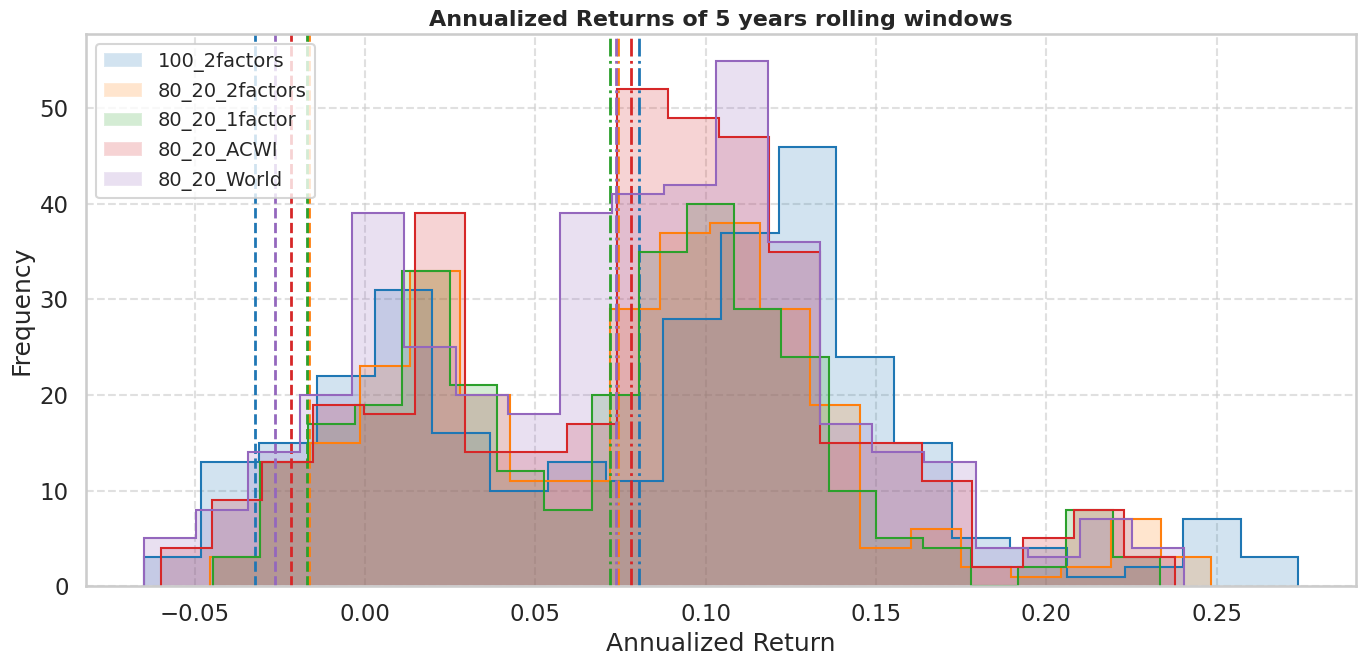

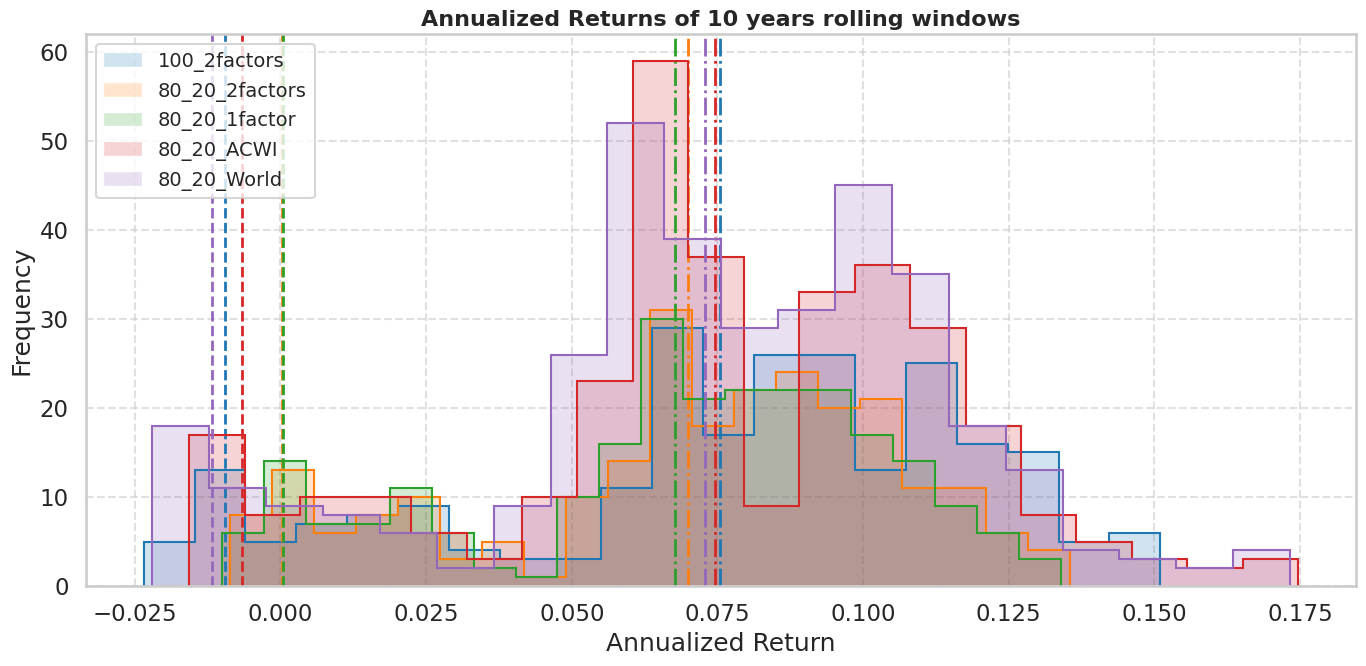

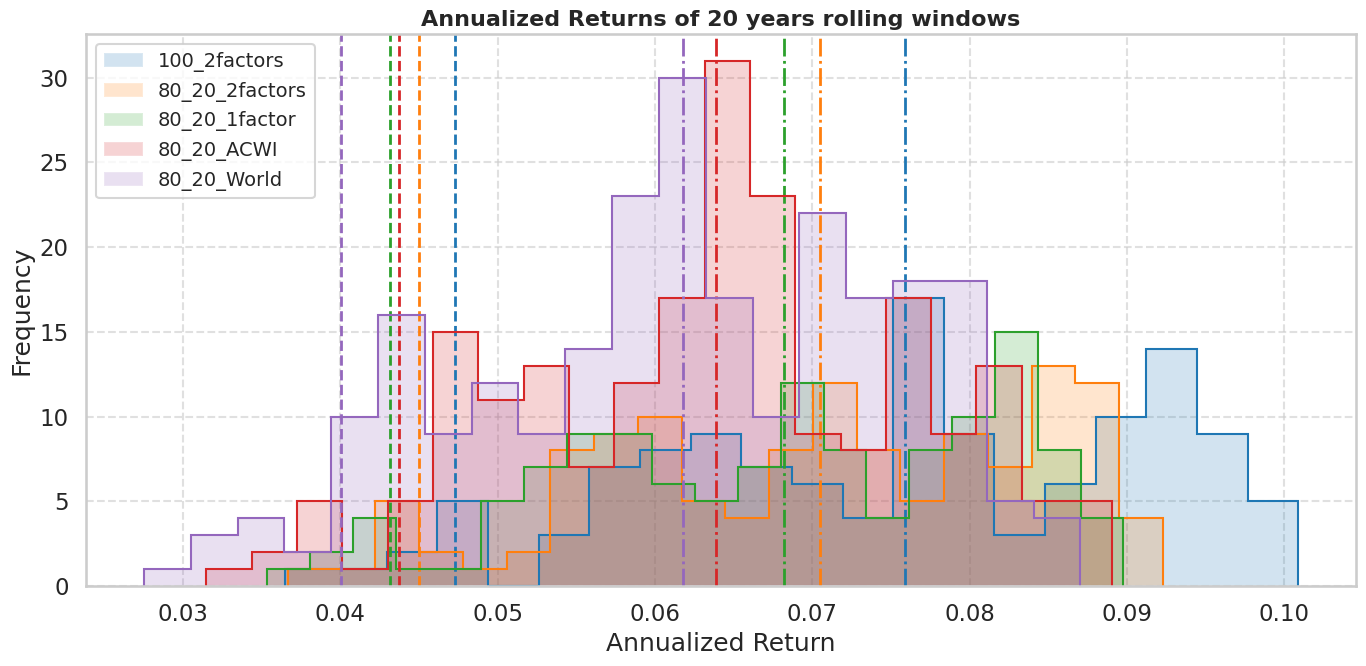

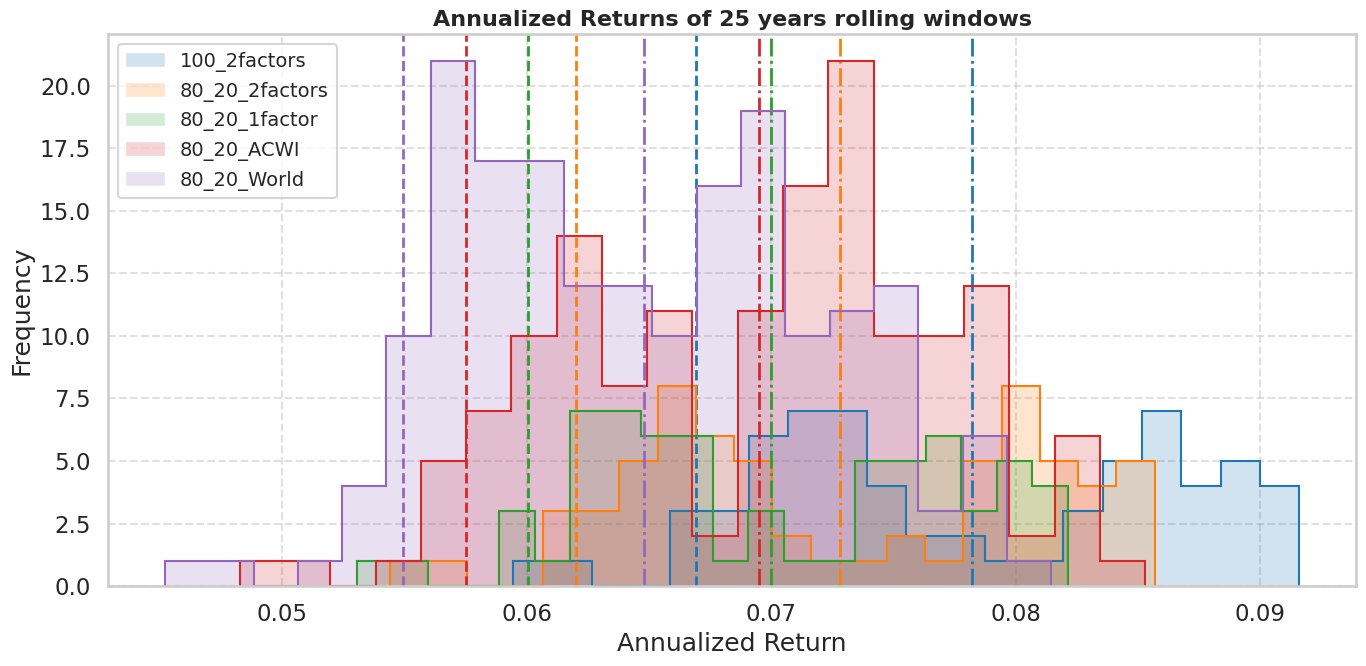

In [5]:
portfolios = ['100_2factors',
              '80_20_2factors',
              '80_20_1factor',
              '80_20_ACWI',
              '80_20_World']

for years in [5, 10, 20, 25]:
    final_results = None 
    for portfolio_name in portfolios:

        portfolio = load_portfolio(portfolio_name)
        data, weights = prune_data_portfolio(portfolio)

        # Compute the returns
        results = compute_portfolio_returns_combined(*prune_data_portfolio(portfolio), years=years)
        results = results.rename(columns={results.columns[-1]: portfolio_name})
        results[portfolio_name] = results[portfolio_name].round(5)

        final_results = merge_results(final_results, results)
    
    plot_annualized_returns(final_results, years=years)
    plot_returns_histogram(final_results, years=years)

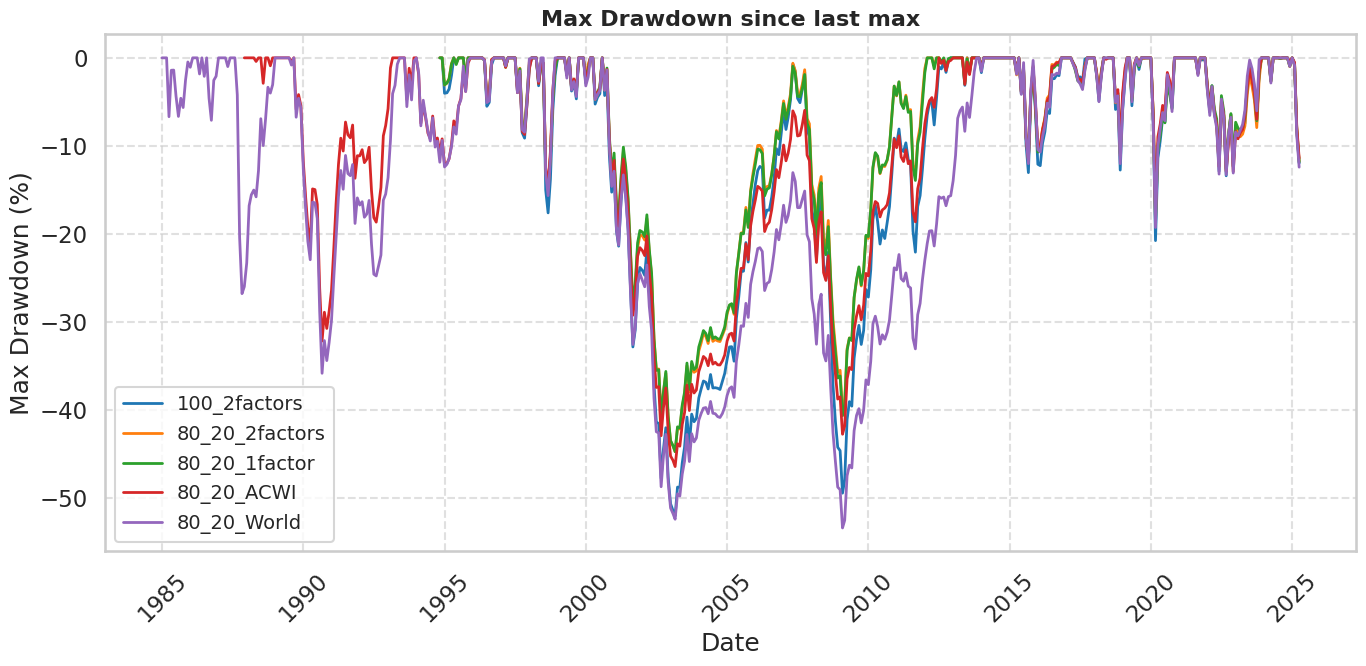

In [63]:
final_maxdrawdown = None

for portfolio_name in portfolios:

    portfolio = load_portfolio(portfolio_name)
    data, weights = prune_data_portfolio(portfolio)

    prices = compute_portfolio_prices(portfolio, portfolio_name)

    maxdrawdown = max_drawdown(prices)

    final_maxdrawdown = merge_results(final_maxdrawdown, maxdrawdown)

plot_max_drawdown(final_maxdrawdown)